In [51]:
import os
import sklearn
from sklearn.datasets import load_iris, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

#To make the notebook's output stabel across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path to saving images
IMAGE_PATH = os.path.join("images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, fig_extension="png", tight_layout=True, resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure,", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Most applications of Machine Learning today are based on supervised learning, yet the vast majority of the available data is unlabeled: **we have input feature X, but we don't have the labels y.** Therefore, there is a huge potential in unsupervised learning.

Labeling data requires human experts to go through all the data, which is long costly and tedious task, even for a small subset from of a large dataset. Thus the labeled dataset will quite small, resulting in a poor performance from a classifier. Additionally, every time a company makes any changes to its products, the whole process will need to be started from scratch. 

**Unsupervised learning aims to exploit the unlabeled data without needing humans to label every instance in the dataset/subset.**

Dimensionality reduction is one of the common tasks for unsupervised learning and was discussed in a previous notebook. Thus, we'll focus on a few more unsupervised learning tasks and algorithms:
- **Clustering**
    - The goal is to group similar instacnes together into _clusters_. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction and more.

- **Anomaly detection**
    - The objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

- **Density estimation**
    - This is the task of estimating the _probabilty density function_ (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances that are located in very low-dimensional regions are more likely to be anomalies. It's also useful for data analysis and visualization.

We'll look at **clustering** first, using K-Means and DBSCAN. Then, discuss Gaussian mixture models and see how they can be used for density estimation, clustering and anomaly detection

# Section: Clustering

***Clustering*** is a task that identifies similar instances and assigning them to _clusters_ or groups of similar instances. It's just like classification, but clustering is an **unsupervised task.** 

In the following figure (figure 9-1), **on the left** is the iris dataset, where each instance's species is represented with a different marker. It's a labeled dataset, so classfication algorithms such as Logistic Regression, SVMs or Random Forest classfiers are well suited.

**On the righ** is the same dataset, but without labels, thus classifications algorithms are of no use. This is where clustering algorithms comes in, many of them can easily detect the lower-left cluster. 

The dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well - when we use Gaussian mixture model, only 5/150 are assigned to the wrong cluster (96.66% success rate).

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure, Unsupervised Learning Techniques - Classification vs clustering


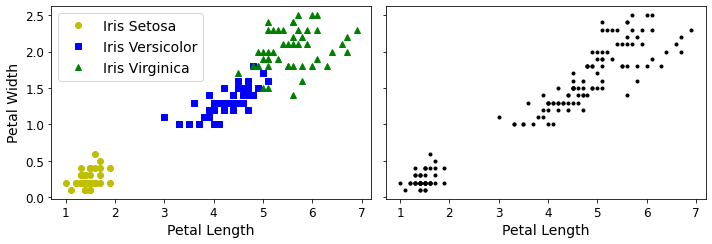

Figure 9-1


In [3]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris Setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris Versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris Virginica")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal Length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("Unsupervised Learning Techniques - Classification vs clustering")
plt.show()
print("Figure 9-1")

    - A Gaussian mixture model can help separate these clusters pretty well using all 4 features: petal length and width, and sepal length and width

In [28]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

    - Let's map each cluster to a class. We'll pick the most common class for each cluster (using the scipy.stats.mode() function)

In [6]:
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id]) #"_" ignores a value when unpacking
    mapping[mode[0]] = class_id
mapping

{1: 0, 2: 1, 0: 2}

In [33]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

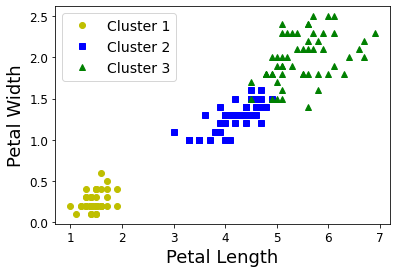

In [38]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal Length", fontsize=18)
plt.ylabel("Petal Width", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

    - Check how many right prediction we got

In [39]:
np.sum(y_pred == y)

145

In [41]:
np.sum(y_pred == y) / len(y)

0.9666666666666667

**Applications that use clustering inculde:**

- **Customer segmentation**
    - Clustering customers based on their purchases and their activity on a website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For instance, it can be useful in _recommender systems_ to suggest content that other users in the same cluster enjoyed.
    
    
- **Data analysis**
    - When analyzing a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately
    
    
- **As a dimensionality reduction technique**
    - Once a dataset has been clustered, it's usually possible to measure each instance's _affinity_ with each cluster (_affinity_ is any measure of how will an instance fits into a cluster). Each instances' feature vector $x$ can be replaced with the vector of its clusters affinities. If there a re $k$ clusters, then this vector is $k$ dimnesional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing
    
    
- **Anomaly detection (also called outlier detection)**
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual request per second. Anomaly detection is paritcularly useful in detecting defects in manufacturing or fraud detection
    
    
- **Semi-supervised learning**
    - If there are only a few labels available, it's possible to perform clustering and propogate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for subsequent supervised learning algorithm, thus improving performance
    
    
- **Search engines**
    - Some search engines allow you to search for images that are similar to a reference image. To build such a system, first apply a clustering algorithm to all the images in the database - similar images would end up in the same cluster. Then when a user provides a reference image, use the trained clustering model to find this image's cluster, and then you can return all the images from this cluster
    
    
- **To segment an image**
    - By clustering pixels according to their color, then replacing each pixel's color with the mean color of the cluster, it's possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object
    

A cluster depends on the context, and different algorithms will capture different kinds of clusters. For examples, algorithms that look for instances centered around a particular point, called _centroid_. Others look for continuous regions of densely packed instances: these clusters can take on any shape

## K-Means

In the following figure 9-2, its clear that there are 5 blobs of instances. The k-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often with just a few iterations. K-Means is sometimes referred to as Lloyd-Forgy, because it was published by two different people from different places

In [43]:
blob_centers = np.array([
    [ 0.2,  2.3],
    [-1.5 ,  2.3],
    [-2.8,  1.8],
    [-2.8,  2.8],
    [-2.8,  1.3]
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [44]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                 random_state=7)

Saving figure, Clustering - KMeans, Unlabeled dataset of 5 blobs


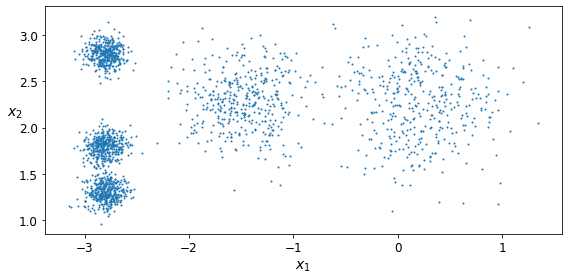

Figure 9-2


In [49]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", rotation=0, fontsize=14)

plt.figure(figsize=(8,4))
plot_clusters(X)
save_fig("Clustering - KMeans, Unlabeled dataset of 5 blobs")
plt.show()
print("Figure 9-2")

    - Fit and predict by using the KMeans on this dataset. It will try to find each blob's center and assign each instance to the closest blob

**Note** specifying the number of clusters is generally not that easy.

In [54]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

    - Each instances has been assigned to one of the 5 clusters

In [57]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

**Note** in Kmeans, the ***label*** of an instance is the **_index_ of the cluster it gets assigned to**

In [59]:
y_pred is kmeans.labels_

True

    - Estimation of the 5 centroids

In [61]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

    - Predict labels of new instances

In [64]:
X_new = np.array([
    [0, 2],
    [3, 2],
    [-3, 3],
    [-3, 2.5]
])
kmeans.predict(X_new)

array([1, 1, 2, 2])

    - Let's plot the cluster's decision boundries (gives a Voronoi diagram)

In [87]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=35, linewidths=8, 
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1,
            color="k")
    
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0, fontsize=14)
    else:
        plt.tick_params(labelleft=False)

<ipython-input-87-50808b416ee9>:22: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1,


Saving figure, Clustering - KMeans, decision boundaries


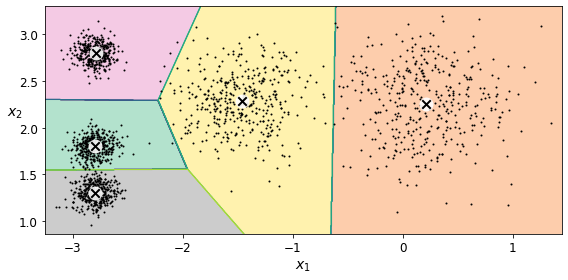

Figure 9-3


In [89]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("Clustering - KMeans, decision boundaries")
plt.show()
print("Figure 9-3")

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instance were probably mislabeled (especially near the boundary between the top-left cluster and the central cluster). 

When the blobs vary in diameters, K-Means doesn't perform that well because all it care about when assigning instances to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, called ***hard clustering***, it cab be useful to give each instance a score per cluster, called ***soft clustering***.

The score can be the distance between the instance and the centroid, or the similarity score (or affinity), such as the Gaussian Radial Bases Function (RBF). 

In KMeans, the ***transform()*** method measures the distance from each instance to every centroid

In [90]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

We can verify this by calculating the Euclidian distance between each instance and each centroid

In [91]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k ,2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

Recall that X_new has 4 instances and 5 clusters. We can see that the first instances distance from the first cluster is 2.81, on the second cluster it's 0.32 and so on.

If you have a high-dimensional dataset and you transform it this way, you end up with $k$-dimensional dataset: this transformation can be a very **efficient nonlinear dimnesionality reduction technique.**

#### The K-Means algorithm